In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [44]:
path = r"/Users/prashantkumar/Downloads/Data (2)/features_30_sec.csv"
df = pd.read_csv(path)
df.tail()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,1.222421e+06,0.089227,0.001305,1.926835e-06,0.004594,-0.000012,0.000681,103.359375,-153.640961,2540.949463,109.864647,455.579956,-23.065695,189.883865,59.050125,132.334518,-7.475873,92.553497,19.726795,58.462181,-16.484838,89.278427,18.066439,43.789928,-22.202005,77.724525,15.409106,61.443748,-12.372051,42.666080,12.348828,43.414345,-12.297895,49.383522,5.777902,56.457893,-10.273881,36.433578,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,1.046621e+06,0.097664,0.000868,-1.406142e-06,0.003981,-0.000012,0.000818,117.453835,-142.392029,3282.358887,116.189629,345.518890,-32.147167,191.464813,49.117840,66.674255,-8.373376,81.370674,22.882061,44.545662,-18.315985,63.946007,20.098146,43.887966,-22.093319,37.119415,10.798820,53.151684,-12.979385,44.253551,14.080058,38.195637,-16.392994,34.824745,4.154395,29.224157,-4.364872,43.484493,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,8.042154e+05,0.121823,0.001697,-4.881450e-07,0.003825,-0.000014,0.001124,129.199219,-124.952271,1681.638794,115.177155,475.088074,-47.975151,290.302795,52.814674,113.682693,-13.484810,77.294281,21.742352,81.096153,-12.407492,59.990017,20.122042,41.712540,-18.363756,44.554043,10.120382,82.069191,-16.037611,43.337452,10.474113,42.966385,-17.947060,44.368690,1.212127,37.248077,-11.519417,39.505585,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,1.332712e+06,0.048724,0.000808,7.986756e-07,0.006077,-0.000013,0.000653,73.828125,-225.007751,10766.367188,123.646751,492.819122,-9.724174,605.487488,56.605164,189.945770,10.436500,156.834641,20.622280,211.036163,-10.253696,107.069740,15.561657,103.171165,-8.227290,69.988968,12.800152,92.819435,-9.001975,63.858929,7.682845,75.528023,-10.070732,56.776089,-0.256386,42.620800,-5.275370,46.763134,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock
999,rock.00099.wav,661794,0.358401,0.085884,0.054454,0.000336,1609.795082,422203.216152,1797.213044,120115.632927,3246.908930,1.753476e+06,0.076305,0.002171,4.603694e-07,0.002664,-0.000016,0.000191,123.046875,-235.161972,7712.194336,123.870110,798.665283,-22.538395,518.708618,52.939743,228.190399,-1.444669,182.343460,24.641056,126.902298,-7.073817,119.129547,14.880081,93.618126,-12.769979,79.731667,16.712587,76.233124,-2.936967,79.307365,10.076435,45.758392,-15.024692,42.938053,3.116931,67.357964,-7.123283,58.056416,1.794104,59.167755,-7.069775,73.760391,0.028346,76.504326,-2.025783,72.189316,1.155239,49.662510,rock


In [45]:
df['label'].value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

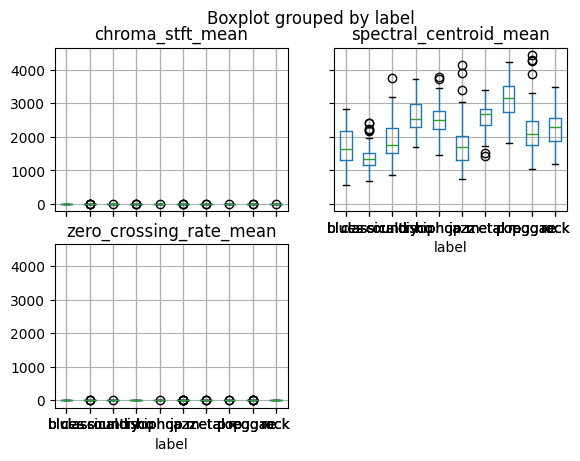

In [46]:
plt.figure(figsize=(12,6))
df.boxplot(column=['chroma_stft_mean', 'spectral_centroid_mean', 'zero_crossing_rate_mean'], by = "label")
plt.xticks(rotation=45)
plt.title('Audio Features by Genre')
plt.show()

In [47]:
le = LabelEncoder()
df['label_encoded']= le.fit_transform(df['label'])

x = df.drop(['filename', 'label', 'label_encoded'], axis=1)
y = df['label_encoded']

x = x.fillna(x.mean())

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42, stratify=y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [48]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(3, 21, 2), 
              'weights': ['uniform', 'distance'],
              'metric': ['educlidean', 'manhattan', 'minkowski']
              }



In [49]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring= 'accuracy', n_jobs= -1)
grid_search.fit(x_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_knn = grid_search.best_estimator_

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Test Accuracy: 0.72
              precision    recall  f1-score   support

       blues       0.88      0.70      0.78        20
   classical       0.87      1.00      0.93        20
     country       0.65      1.00      0.78        20
       disco       0.45      0.50      0.48        20
      hiphop       0.87      0.65      0.74        20
        jazz       0.89      0.80      0.84        20
       metal       0.81      0.65      0.72        20
         pop       0.70      0.70      0.70        20
      reggae       0.62      0.50      0.56        20
        rock       0.61      0.70      0.65        20

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



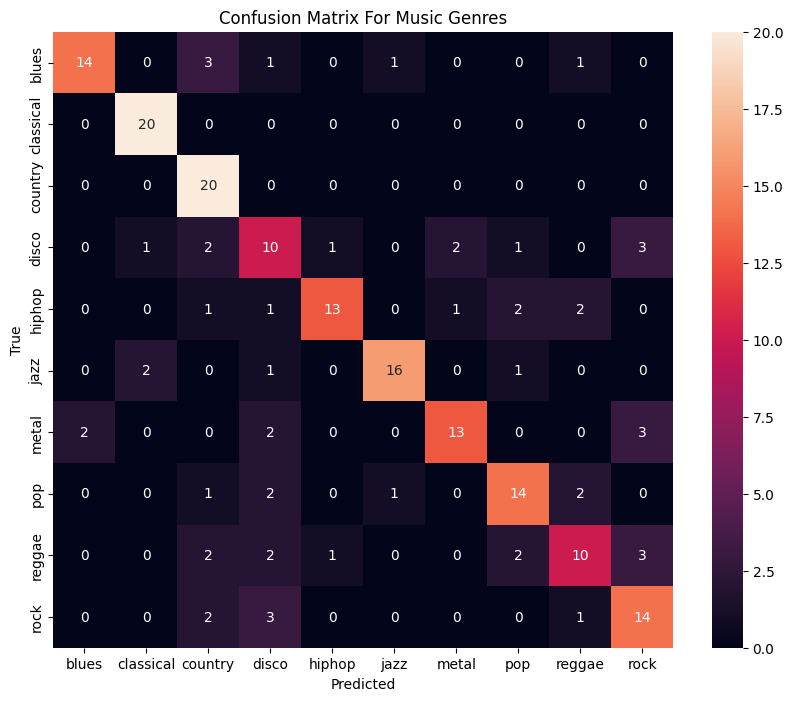

In [50]:
# Prediction on test set
y_pred = best_knn.predict(x_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For Music Genres')
plt.show()

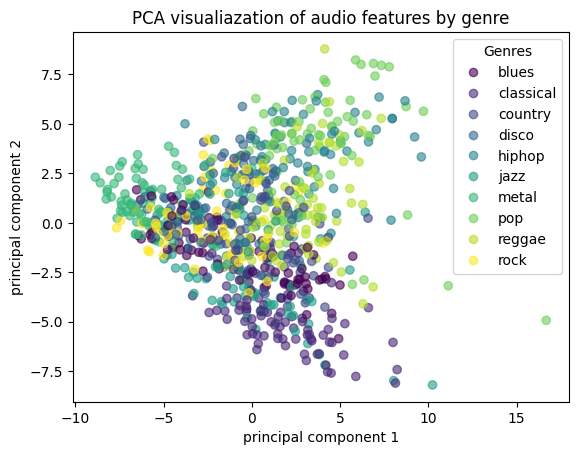

In [30]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_scaled)

plt.Figure(figsize=(10,6))
scatter = plt.scatter(x_pca[:,0], x_pca[:,1], c= y_train, cmap='viridis', alpha=0.6)
plt.legend(handles= scatter.legend_elements()[0], labels = list(le.classes_), title = "Genres")
plt.title('PCA visualiazation of audio features by genre')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()